In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8] # setting figure size

In [ ]:
main_path = '/content/drive/MyDrive/Project/LiveCommerse/Python_Code/Re_zero부터시작하는분석/'
# file_path = main_path + 'FUCKUGOOGLE/종합몰_g-DMR/종합몰_Score_DF.xlsx'
file_path = main_path + 'Coherence_Score_DF.xlsx'

In [ ]:
dff = pd.read_excel(file_path)
dff.head(10)

,K_Num,Remove_Top,Min_Df,Min_Cf,C_S_Umass,C_S_Cuci,C_S_Cnpmi,C_S_Cv
0,2,10,10,20,-0.292117,0.128276,0.027628,0.522670
1,2,25,0,10,-0.271887,0.083493,0.017470,0.508298
2,2,25,5,10,-0.450983,0.025813,0.007349,0.501507
3,2,25,0,15,-0.263356,0.062787,0.015214,0.499511
4,2,25,10,0,-0.278713,0.062787,0.015214,0.499511
5,2,25,10,5,-0.278713,0.062787,0.015214,0.499511
6,2,25,10,10,-0.278713,0.062787,0.015214,0.499511
7,2,25,0,20,-0.271792,0.062787,0.015214,0.499511
8,2,25,20,0,-0.279847,0.062787,0.015214,0.499511
9,2,25,20,5,-0.279847,0.062787,0.015214,0.499511


In [ ]:
dff = dff[dff['Min_Df'] > 9]
dff = dff[dff['Remove_Top'] > 9]
dff = dff.sort_values(by = 'Min_Cf')

In [ ]:
dff.Min_Cf.unique()

array([ 0,  5, 10, 15, 20])

In [ ]:
fig = px.scatter(dff,
                 x = 'K_Num',
                 y = 'C_S_Cv',
                 size = 'Remove_Top',
                 color = 'Min_Df',
                 facet_col = 'Min_Cf',
                 trendline = 'lowess',
                 trendline_options=dict(frac=0.4),
                 trendline_color_override = 'black',
                 labels={
                     "K_Num": "K Number",
                     "C_S_Cv": "Coherence Score",
                     "Min_Cf": "Min_CF",
                     "Min_Df" : "Min_DF"
                 },
                 width=2000, height=700)
fig.show()

In [ ]:
for num_cf in [0, 5, 10, 15, 20]:
  df = dff[dff.Min_Cf == num_cf]
  X_1 = df.K_Num
  X_2 = df.Remove_Top
  X_3 = df.Min_Df
  X_4 = df.Min_Cf
  y = df.C_S_Cv

  fig = px.scatter(x = X_1, # x
            y= y, # y
            size =3*X_2, # marker size
            color=X_3, # marker color
            trendline='lowess')

  # fig.title(f'Coherence Score, CF = {num_cf}', fontsize=14)
  # fig.xlabel('Number of K', fontsize=12)
  # fig.ylabel('Coherence Score', fontsize=12)
  # fig.colorbar()
  # plt.savefig(main_path + f'FUCKUGOOGLE/종합몰_g-DMR/종합몰_Coherence_Score_CF_{num_cf}_DF_10.png') 
  # plt.savefig(main_path + f'CohScore/Coherence_Score_CF_{num_cf}_DF_10.png')
  fig.show()


AttributeError: ignored

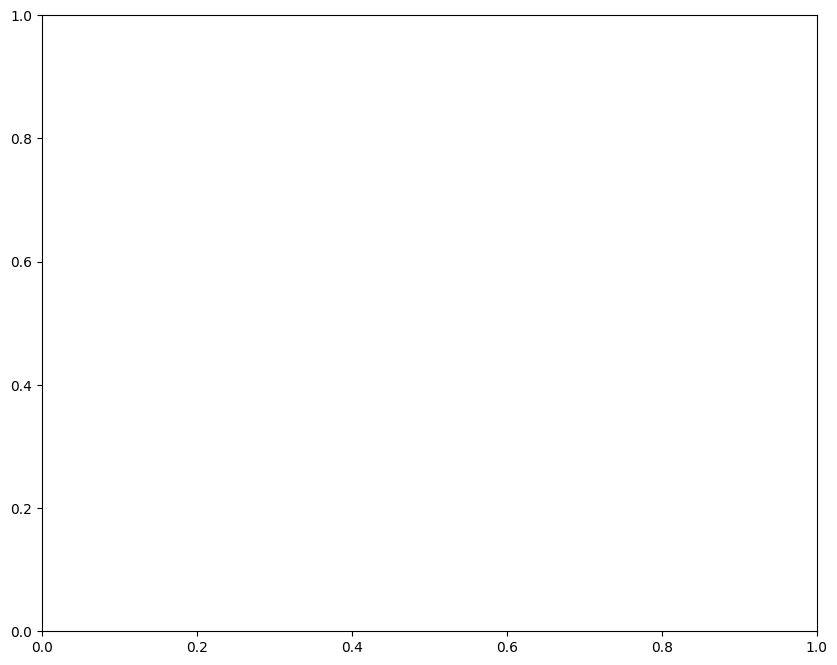

In [ ]:
for num_cf in [0, 5, 10, 15, 20]:
  df = dff[dff.Min_Cf == num_cf]
  X_1 = df.K_Num
  X_2 = df.Remove_Top
  X_3 = df.Min_Df
  X_4 = df.Min_Cf
  y = df.C_S_Cv

  plt.scatter(X_1, # x
            y, # y
            alpha=0.6, 
            s=3*X_2, # marker size
            c=X_3, # marker color
            cmap='viridis',
            trendline='ols')

  plt.title(f'Coherence Score, CF = {num_cf}', fontsize=14)
  plt.xlabel('Number of K', fontsize=12)
  plt.ylabel('Coherence Score', fontsize=12)
  plt.colorbar()
  # plt.savefig(main_path + f'FUCKUGOOGLE/종합몰_g-DMR/종합몰_Coherence_Score_CF_{num_cf}_DF_10.png') 
  plt.savefig(main_path + f'CohScore/Coherence_Score_CF_{num_cf}_DF_10.png')
  plt.show()


KeyError: ignored

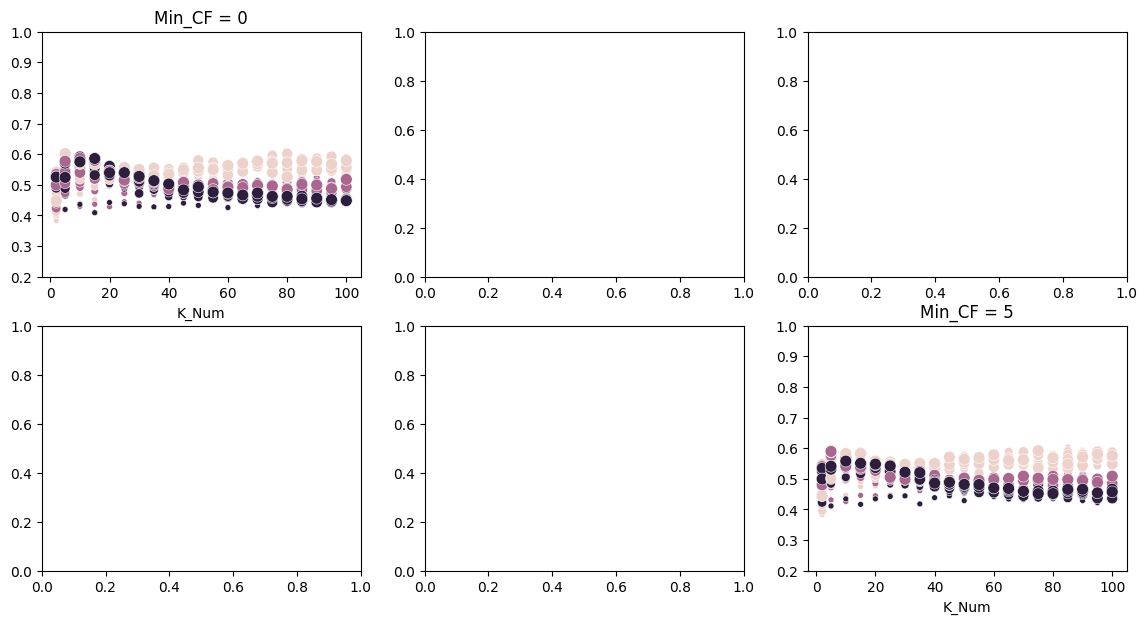

In [ ]:
fig = plt.figure(figsize=(14,7))

widths = [4, 4, 4]
heights = [4, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

for i in [0,5,10,15,20]:
  df = dff[dff.Min_Cf == i]
  X_1 = df.K_Num
  X_2 = df.Remove_Top
  X_3 = df.Min_Df
  y = df.C_S_Cv
  plot = sns.scatterplot(x = df.K_Num , y=df.C_S_Cv, data=df, hue=df.Min_Df, size=1*df.Remove_Top, ax=axs[i], legend = False, )
  plot.set(title = f'Min_CF = {i}')
  plot.set(ylabel=None)

  plot.set(ylim=(0.2, 1))

fig.tight_layout()
fig.savefig(main_path + 'Score_df_투어전문몰.png')

In [ ]:
import os
Path_1 = '/content/drive/MyDrive/Project/LiveCommerse/FUCKUGOOGLE/nonTour_df'
Path_2 = '/content/drive/MyDrive/Project/LiveCommerse/FUCKUGOOGLE/Tour_only_df'
Mall_super_list = os.listdir(Path_1)
Mall_tour_list = os.listdir(Path_2)
Mall_super_list.remove('Complete_list.pkl')
Mall_super_list.remove('Check_list.pkl')
Mall_tour_list.remove('Complete_list.pkl')
Mall_tour_list.remove('Check_list.pkl')

In [ ]:
Mall_tour_list[:50]

['브이패스_38573',
 '에버랜드_67619',
 '아쿠아필드_70207',
 '경주월드_76553',
 '하이원리조트_67444',
 '롯데월드 어드벤처 부산_67238',
 '캐리비안베이_68969',
 '이천 테르메덴_92563',
 '휘닉스 호텔앤드리조트_66849',
 '원마운트 워터파크_72886',
 '반얀트리 클럽 앤 스파 서울_63916',
 '올스테이_62139',
 '서울랜드_76202',
 '와그WAUG_64371',
 '파라다이스시티_70208',
 '오늘의 여행 맛zip_93165',
 '알펜시아리조트_92519',
 '스플라스 리솜_67510',
 '야놀자_69787',
 '에코랜드_89047',
 '중흥골드스파_93318',
 '히든클리프호텔_68114',
 '안성팜랜드_87749',
 '비발디파크 쇼핑라이브_69543',
 '파라다이스 스파 도고_92112',
 'WEPICK_40207',
 '선이몰_18823',
 '보홀트레이더스_67856',
 '웅진플레이도시_89935',
 '설악 워터피아_59387',
 'SEAMARQ HOTEL_68113',
 '라온 더마파크_90368',
 '대구 이월드_93297',
 '캠프통_71784',
 '워커힐_69736',
 '렛스테이_69573',
 '그랜드 하얏트 서울_65305',
 '심플티켓몰_65073',
 '광명동굴_87583',
 '쇼핑나인_89324',
 '